# Reto 6. Machine Learning Jupyter
## Programa Enseña by Oracle Spain


### 1. Análisis exploratorio de datos

In [20]:
# Fundamental libraries
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# scikit-learn: model selection, preprocessing, pipelines, metrics, etc.
from sklearn.model_selection import (
    train_test_split,
    GridSearchCV
)
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    accuracy_score,
    mean_squared_error,
    r2_score,
    make_scorer
)
from sklearn.inspection import permutation_importance

# Deep learning
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Model explanation
import shap

In [9]:
df = pd.read_csv('trainsongs.csv')
df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [10]:
# Primer vistazo al dataset
print("Dimensiones del DataFrame:", df.shape)
print("\nPrimeras filas:")
display(df.head())

# Tipos de datos y valores nulos
print("\nInformación general:")
display(df.info())
print("\nValores nulos por columna:")
display(df.isnull().sum())

Dimensiones del DataFrame: (114000, 21)

Primeras filas:


,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic



Información general:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16

None


Valores nulos por columna:


Unnamed: 0          0
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64


Estadísticas descriptivas:


,Unnamed: 0,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,114000.000000,114000.000000,1.140000e+05,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000
mean,56999.500000,33.238535,2.280292e+05,0.566800,0.641383,5.309140,-8.258960,0.637553,0.084652,0.314910,0.156050,0.213553,0.474068,122.147837,3.904035
std,32909.109681,22.305078,1.072977e+05,0.173542,0.251529,3.559987,5.029337,0.480709,0.105732,0.332523,0.309555,0.190378,0.259261,29.978197,0.432621
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28499.750000,17.000000,1.740660e+05,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218750,4.000000
50%,56999.500000,35.000000,2.129060e+05,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000
75%,85499.250000,50.000000,2.615060e+05,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.598000,0.049000,0.273000,0.683000,140.071000,4.000000
max,113999.000000,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


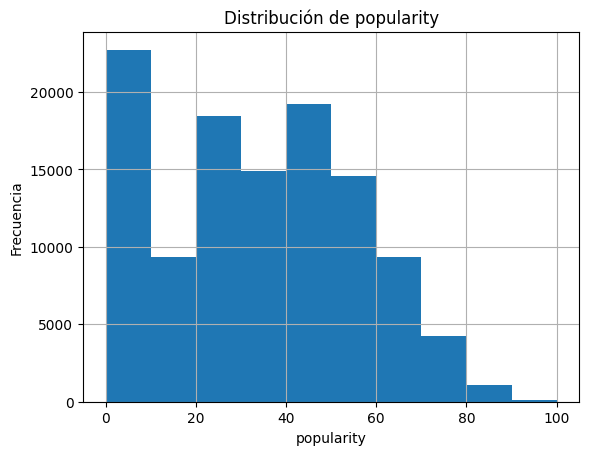

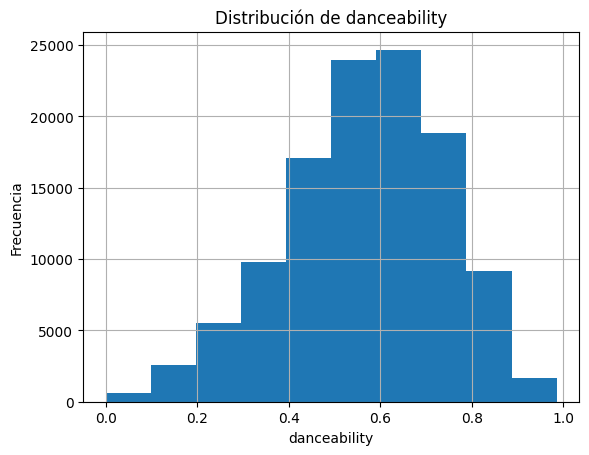

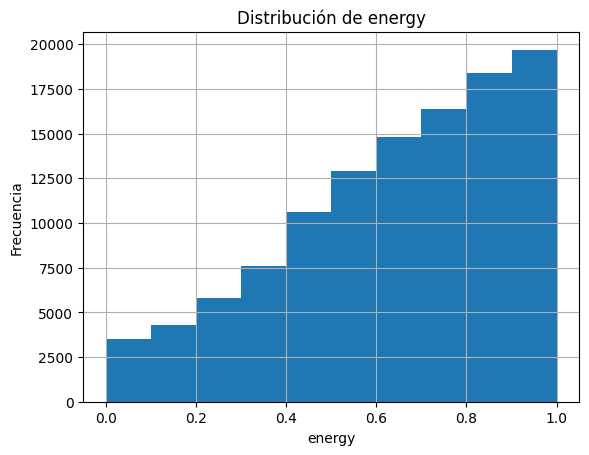

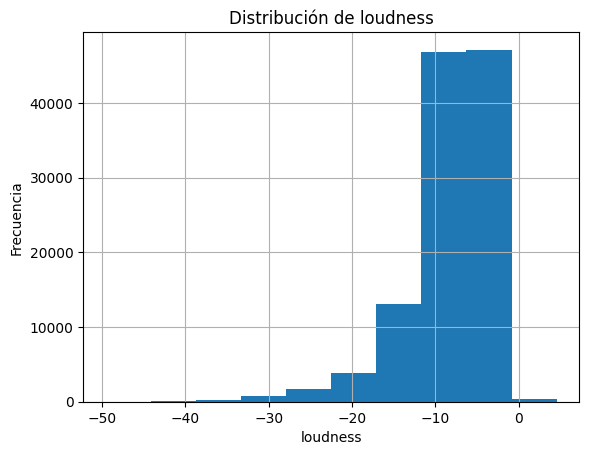

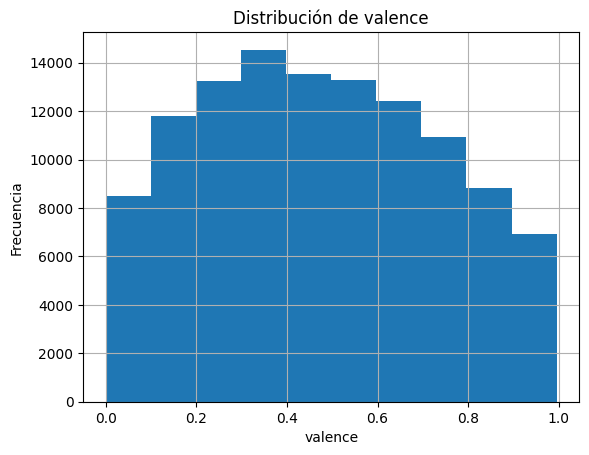

In [11]:
# Estadísticas descriptivas de variables numéricas
print("\nEstadísticas descriptivas:")
display(df.describe())

# Distribuciones univariadas
cols_a_hist = ['popularity', 'danceability', 'energy', 'loudness', 'valence']
for col in cols_a_hist:
    plt.figure()
    df[col].hist()
    plt.title(f'Distribución de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.show()

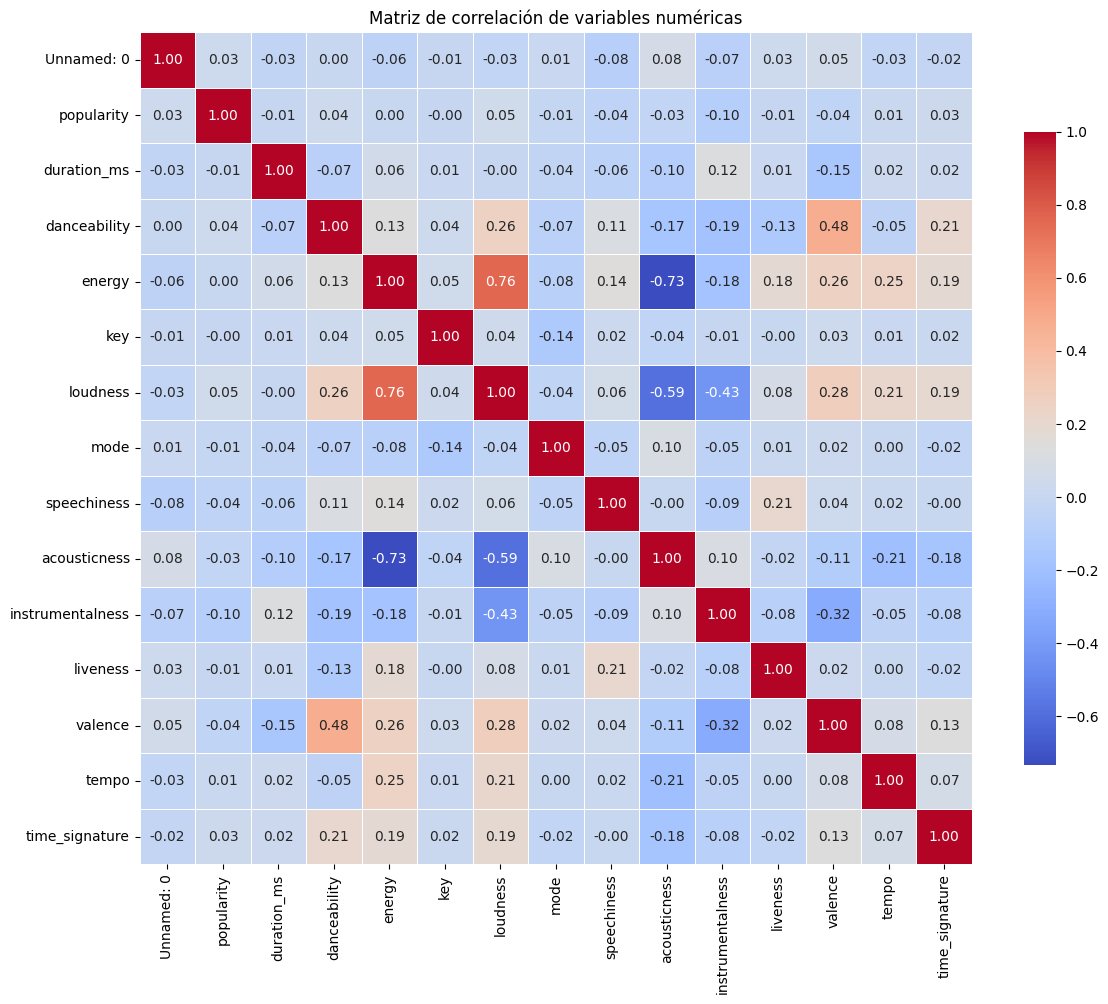

In [12]:
# Cálculo de la matriz de correlación solo con variables numéricas
corr = df.select_dtypes(include='number').corr()

# Plot
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True, 
            cbar_kws={"shrink": .75}, linewidths=.5)
plt.title('Matriz de correlación de variables numéricas')
plt.tight_layout()
plt.show()

### Entrenamiento y validación del modelo

#### 1. Random Forest

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

df = df.select_dtypes(exclude=['object'])
# Prepare the data for training
X = df.drop(columns=['popularity'])
y = df['popularity']

# Process categorical data
# Identify categorical and numerical columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])
# Combine transformers into a preprocessor
preprocessor = ColumnTransformer(transformers=[
    ('num', numerical_transformer, numerical_cols)
])
# Apply preprocessing
X = preprocessor.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
# Train the RandomForestRegressor
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

# Evaluate the model
y_pred = rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Error cuadrático medio (MSE): {mse:.2f}")
print(f"Raíz del error cuadrático medio (RMSE): {rmse:.2f}")
print(f"Coeficiente de determinación (R²): {r2:.4f}")

Error cuadrático medio (MSE): 207.25
Raíz del error cuadrático medio (RMSE): 14.40
Coeficiente de determinación (R²): 0.5800


In [15]:
# Define parameter grid for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform Grid Search
grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42), param_grid=param_grid, cv=3, scoring='r2', verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)
print(f'Best parameters: {grid_search.best_params_}')
best_rf = grid_search.best_estimator_

Fitting 3 folds for each of 108 candidates, totalling 324 fits


[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=  28.4s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=  28.4s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=  28.6s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=  28.7s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=  28.8s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=  28.8s
[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=10, n_estimators=50; total time=  51.9s
[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=5, n_estimators=50; total time=  52.3s
[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total time=  52.4s
[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=5, n_estimators=50; total time

KeyboardInterrupt: 

In [ ]:
# Evaluate the best model
y_pred = best_rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred.round())
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R²:', r2_score(y_test, y_pred))

In [ ]:
# Explainability: Feature Importance
importances = best_rf.feature_importances_
feature_names = X.columns
plt.figure(figsize=(10, 6))
plt.barh(feature_names, importances)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in Random Forest')
plt.show()

# Explainability: Permutation Importance
perm_importance = permutation_importance(best_rf, X_test, y_test, n_repeats=10, random_state=42)
sorted_idx = perm_importance.importances_mean.argsort()
plt.figure(figsize=(10, 6))
plt.barh(feature_names[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel('Permutation Importance')
plt.ylabel('Feature')
plt.title('Permutation Importance in Random Forest')
plt.show()

#### 2. Linear Regression

In [17]:
dfl = pd.read_csv('trainsongs.csv')
data = dfl.drop('track_id', axis=1) # DROP id column
data = data.select_dtypes(exclude=['object'])
data = data.drop('Unnamed: 0', axis=1)

In [18]:
numerical_features = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness',
                      'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'time_signature']

# Crea un objeto StandardScaler y escala las columnas
scaler = StandardScaler()
data[numerical_features] = scaler.fit_transform(data[numerical_features])

In [21]:
# Separate features (X) and target (y)
X = data.drop('popularity', axis=1)
y = data['popularity']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model (Logistic Regression as an example)
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R²:", r2_score(y_test, y_pred))

MSE: 482.39099705856654
RMSE: 21.963401308963203
R²: 0.022472781708298806


#### 3. Deep Learning usando redes neuronales

/home/alara/other/crypto_cursor/env/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-05-12 12:26:25.938391: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: CUDA_ERROR_UNKNOWN: unknown error
2025-05-12 12:26:25.938425: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:178] verbose logging is disabled. Rerun with verbose logging (usually --v=1 or --vmodule=cuda_diagnostics=1) to get more diagnostic output from this module
2025-05-12 12:26:25.938429: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:183] retrieving CUDA diagnostic information for host: ai-server
2025-05-12 12:26:25.938433: I external/

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,905 (15.25 KB)

 Trainable params: 3,713 (14.50 KB)

 Non-trainable params: 192 (768.00 B)

Epoch 1/50
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 754.3960 - mae: 22.1395 - val_loss: 468.9854 - val_mae: 17.8534
Epoch 2/50
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 489.8185 - mae: 18.2532 - val_loss: 464.1611 - val_mae: 17.6885
Epoch 3/50
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 486.2600 - mae: 18.1772 - val_loss: 463.4745 - val_mae: 17.6957
Epoch 4/50
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 476.1373 - mae: 17.9381 - val_loss: 459.9109 - val_mae: 17.5632
Epoch 5/50
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 471.2724 - mae: 17.8606 - val_loss: 460.1557 - val_mae: 17.6147
Epoch 6/50
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 471.7549 - mae: 17.8452 - val_loss: 459.8782 - val_mae: 17.6173
Epoch 7/50
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 467.4034 - mae: 17.7447 - val_loss: 456.7709 - val_mae: 17.4569
Epoch 8/50
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 469.6628 - mae: 17.8294 - val_loss: 456.1887 - val_mae: 

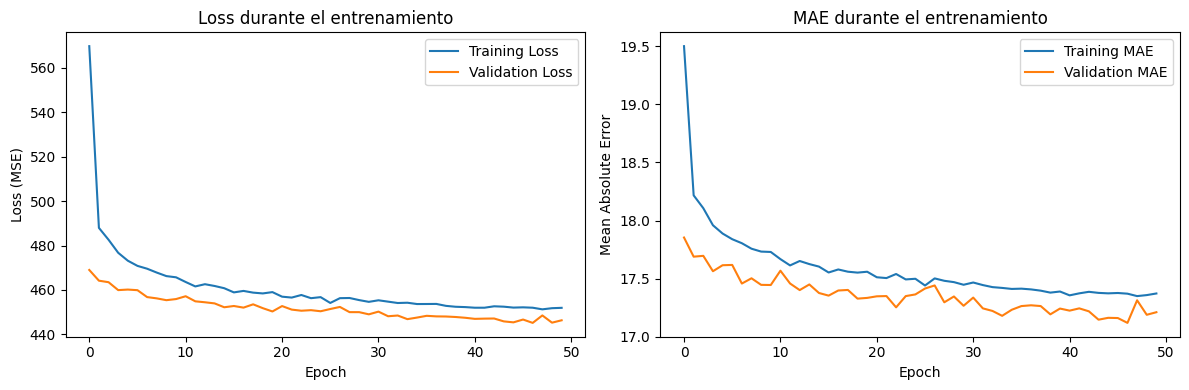

713/713 ━━━━━━━━━━━━━━━━━━━━ 0s 485us/step
MSE: 441.81
RMSE: 21.02
R²: 0.1047


In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import shap

# Preparación de los datos
# Seleccionar solo las variables numéricas
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numeric_cols.remove('Unnamed: 0')  # Eliminamos la columna de índice

# Dividir features y target
X = df[numeric_cols].drop('popularity', axis=1)
y = df['popularity']

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Construir el modelo de red neuronal
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(32, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.2),
    layers.Dense(16, activation='relu'),
    layers.Dense(1)  # Sin activación para regresión
])

# Compilar el modelo
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Resumen del modelo
model.summary()

# Entrenar el modelo con early stopping
early_stopping = keras.callbacks.EarlyStopping(
    patience=10, 
    restore_best_weights=True,
    monitor='val_loss'
)

history = model.fit(
    X_train_scaled, y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=32,
    callbacks=[early_stopping],
    verbose=1
)

# Visualizar el historial de entrenamiento
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss durante el entrenamiento')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('MAE durante el entrenamiento')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.tight_layout()
plt.show()

# Evaluar el modelo
y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.4f}")

713/713 ━━━━━━━━━━━━━━━━━━━━ 0s 421us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 0s 413us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 0s 417us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 0s 417us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 0s 418us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 0s 417us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 0s 418us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 0s 421us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 0s 418us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 0s 414us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 0s 417us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 0s 418us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 0s 419us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 0s 427us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 0s 424us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 0s 417us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 0s 415us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 0s 415us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 0s 418us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 0s 419us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 0s 415us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 0s 418us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 0s 418us/step
713/713 ━━━

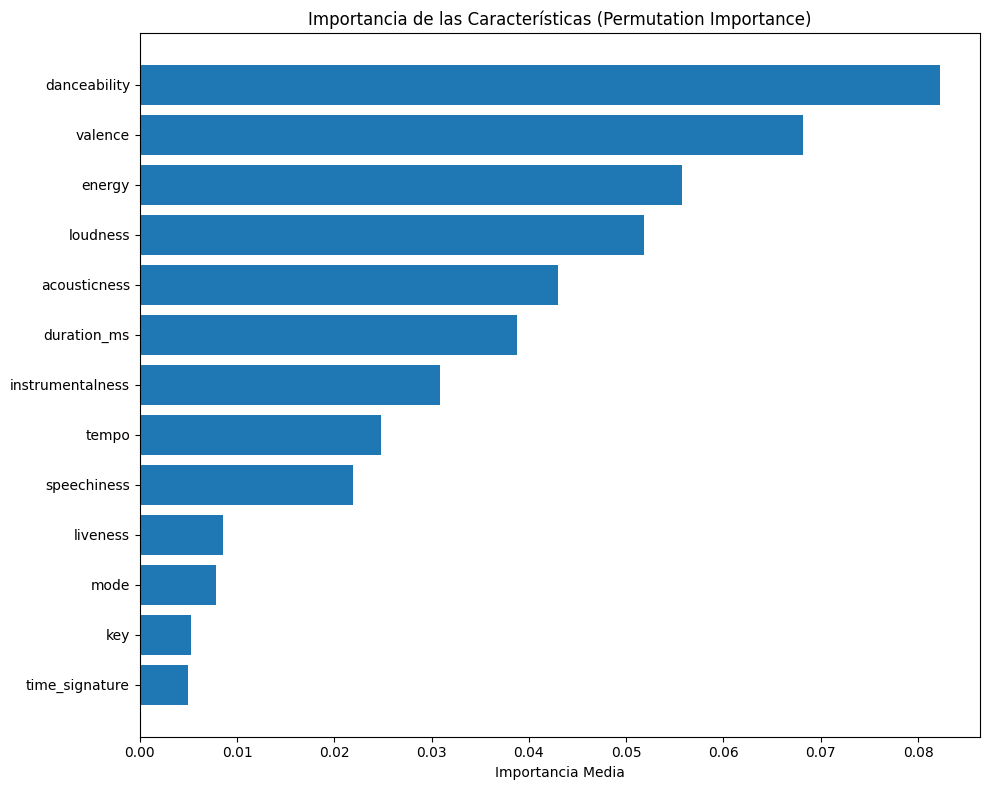

In [23]:
# Análisis de explainabilidad
# Permutation Importance
from sklearn.inspection import permutation_importance
from sklearn.metrics import make_scorer

def custom_score(y_true, y_pred):
    return r2_score(y_true, y_pred)
    
r2_scorer = make_scorer(custom_score)

# Then use the scorer in permutation_importance
perm_importance = permutation_importance(
    model, X_test_scaled, y_test, 
    scoring=r2_scorer,  # Specify your scorer here
    n_repeats=10, 
    random_state=42
)

# Ordenar las características por importancia
importance_sorted_idx = perm_importance.importances_mean.argsort()
feature_names = X.columns

plt.figure(figsize=(10, 8))
plt.barh(
    range(len(importance_sorted_idx)), 
    perm_importance.importances_mean[importance_sorted_idx],
    yerr=perm_importance.importances_std[importance_sorted_idx]
)
plt.yticks(range(len(importance_sorted_idx)), [feature_names[i] for i in importance_sorted_idx])
plt.title('Importancia de las Características (Permutation Importance)')
plt.xlabel('Importancia Media')
plt.tight_layout()
plt.show()

La característica más importante a la hora de decidir la popularidad de una canción es 'danceability', seguida de 'valence' y 'energy'. Procedemos a un análisis de explicabilidad para poder discernir y comparar variables de mejor manera

/home/alara/other/crypto_cursor/env/lib/python3.11/site-packages/shap/explainers/_deep/deep_tf.py:94: UserWarning: Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.
  warnings.warn(
/home/alara/other/crypto_cursor/env/lib/python3.11/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor
Received: inputs=['Tensor(shape=(100, 13))']
  warnings.warn(msg)
/home/alara/other/crypto_cursor/env/lib/python3.11/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor
Received: inputs=['Tensor(shape=(200, 13))']
  warnings.warn(msg)
/home/alara/other/crypto_cursor/env/lib/python3.11/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expect

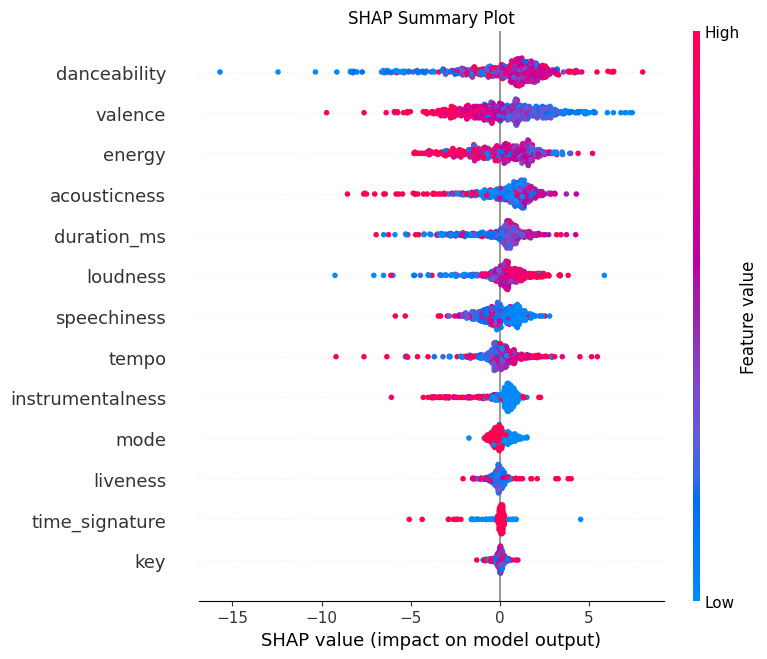

<Figure size 1000x600 with 0 Axes>

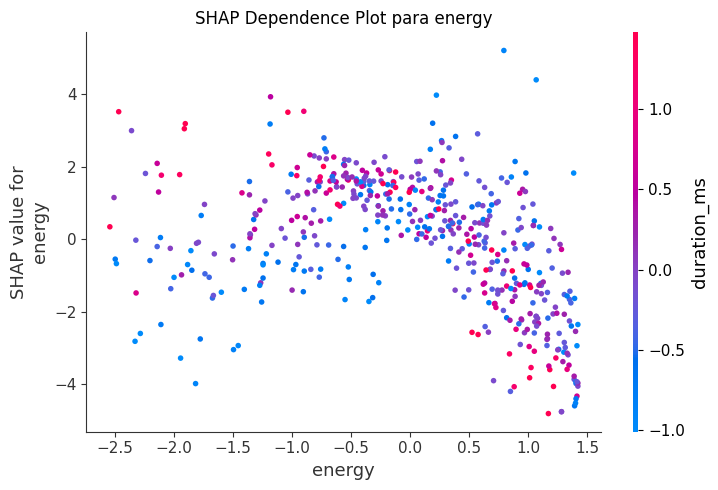

<Figure size 1000x600 with 0 Axes>

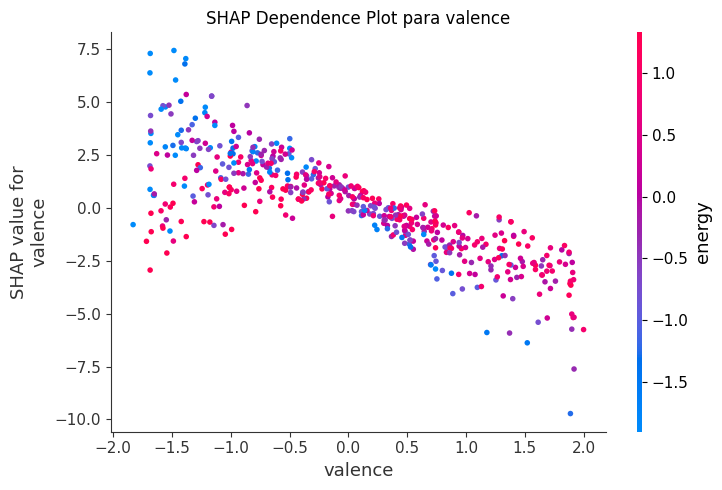

<Figure size 1000x600 with 0 Axes>

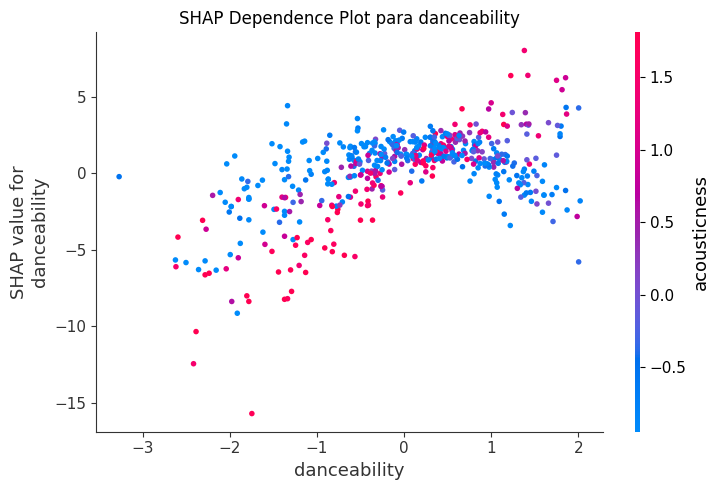

In [24]:
# SHAP Explainability
# Tomamos una muestra más pequeña para el análisis SHAP (puede ser computacionalmente intensivo)
X_sample = X_test_scaled[:500]

# Crear un explicador SHAP
explainer = shap.DeepExplainer(model, X_train_scaled[:100])
shap_values = explainer.shap_values(X_sample)

# Asegurarnos de que shap_values tenga la forma correcta
if isinstance(shap_values, list):
    shap_values = shap_values[0]  # Tomamos el primer elemento si es una lista

# Asegurarnos de que shap_values tenga la misma forma que X_sample
if len(shap_values.shape) > 2:
    shap_values = shap_values.reshape(shap_values.shape[0], -1)

# Visualización de resumen SHAP
plt.figure(figsize=(12, 8))
shap.summary_plot(shap_values, X_sample, feature_names=feature_names, show=False)
plt.title('SHAP Summary Plot')
plt.tight_layout()
plt.show()

# Gráfico de dependencia SHAP para las características más importantes
# Tomamos las 3 características más importantes según el análisis de permutación
top_features_idx = importance_sorted_idx[-3:]
top_features = [feature_names[i] for i in top_features_idx]

for feature in top_features:
    feature_idx = list(feature_names).index(feature)
    plt.figure(figsize=(10, 6))
    
    # Asegurarnos de que los datos tengan la forma correcta para el dependence plot
    if len(shap_values.shape) == 2:
        shap.dependence_plot(
            feature_idx, 
            shap_values, 
            X_sample,
            feature_names=feature_names,
            show=False
        )
    else:
        # Si los shap_values tienen una forma diferente, intentamos aplanarlos
        shap_flat = shap_values.reshape(shap_values.shape[0], -1)
        shap.dependence_plot(
            feature_idx, 
            shap_flat, 
            X_sample,
            feature_names=feature_names,
            show=False
        )
    
    plt.title(f'SHAP Dependence Plot para {feature}')
    plt.tight_layout()
    plt.show()